In [1]:
import PIL
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
PIL.Image.MAX_IMAGE_PIXELS = 231735296

In [2]:
img=mpimg.imread('../data/satellites/watcharapol1.tif')
imgplot = plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/solar-project/data/satellites/watcharapol1.tif'

In [24]:
img.shape

(13312, 17408, 3)

In [1]:
import rioxarray

xds = rioxarray.open_rasterio("../data/satellites/watcharapol1.tif")
_, ysize, xsize = xds.shape

In [2]:
import toml
toml.load('../config.toml')['readtif']

{'name_format': 'filename_xmin_xmax_ymin_ymax',
 'name_mode': 'gps',
 'output_path': 'tiles',
 'stop_if_not_divisible': False,
 'tile_size': 2000,
 'step_size': 0.5}

In [13]:
xds.rio.crs

CRS.from_epsg(3857)

In [11]:
float(xds.x[10].values)

11203549.747100001

In [56]:
NAME_FORMAT = "filename_xmin_xmax_ymin_ymax"
NAME_FORMAT = NAME_FORMAT.split("_")

In [88]:
TILE_SIZE = 2000
STEP_SIZE = 0.5
_MOVING_SIZE = TILE_SIZE * STEP_SIZE
if(_MOVING_SIZE.is_integer() == False):
    raise ValueError(f"expect `TILE_SIZE * STEP_SIZE`=`{TILE_SIZE}*{STEP_SIZE}` to be integer but got {_MOVING_SIZE}")

In [79]:
from itertools import product
TILE_SIZE = 2000
format_dict = {
    "filename":"asdasd",
    "xmin": None,
    "xmax": None,
    "ymin": None,
    "ymax": None
}

_MOVING_SIZE = TILE_SIZE * STEP_SIZE

for ypt, xpt in product(range(0,ysize,TILE_SIZE), range(0,xsize,TILE_SIZE)):
    ymin, ymax = ypt, ypt + TILE_SIZE
    xmin, xmax = xpt, xpt + TILE_SIZE
    if(ymax > ysize):
        ymax = ysize
    if(xmax > xsize):
        xmax = xsize
    format_dict["xmin"] = xmin
    format_dict["xmax"] = xmax
    format_dict["ymin"] = ymin
    format_dict["ymax"] = ymax
    name = ""
    for fmt in NAME_FORMAT:
        name = f"{name}_{format_dict[fmt]}"
    name = name.lstrip("_")
    print(name)
    temp = xds[:,ymin:ymax,xmin:xmax]
    print(temp.shape)
    temp.rio.to_raster(f"ei/{name}.tif")

asdasd_0_2000_0_2000
(3, 2000, 2000)
asdasd_2000_4000_0_2000
(3, 2000, 2000)
asdasd_4000_6000_0_2000
(3, 2000, 2000)
asdasd_6000_8000_0_2000
(3, 2000, 2000)
asdasd_8000_10000_0_2000
(3, 2000, 2000)
asdasd_10000_12000_0_2000
(3, 2000, 2000)
asdasd_12000_14000_0_2000
(3, 2000, 2000)
asdasd_14000_16000_0_2000
(3, 2000, 2000)
asdasd_16000_17408_0_2000
(3, 2000, 1408)
asdasd_0_2000_2000_4000
(3, 2000, 2000)
asdasd_2000_4000_2000_4000
(3, 2000, 2000)
asdasd_4000_6000_2000_4000
(3, 2000, 2000)
asdasd_6000_8000_2000_4000
(3, 2000, 2000)
asdasd_8000_10000_2000_4000
(3, 2000, 2000)
asdasd_10000_12000_2000_4000
(3, 2000, 2000)
asdasd_12000_14000_2000_4000
(3, 2000, 2000)
asdasd_14000_16000_2000_4000
(3, 2000, 2000)
asdasd_16000_17408_2000_4000
(3, 2000, 1408)
asdasd_0_2000_4000_6000
(3, 2000, 2000)
asdasd_2000_4000_4000_6000
(3, 2000, 2000)
asdasd_4000_6000_4000_6000
(3, 2000, 2000)
asdasd_6000_8000_4000_6000
(3, 2000, 2000)
asdasd_8000_10000_4000_6000
(3, 2000, 2000)
asdasd_10000_12000_4000_6000

In [62]:
name = "_asd_ijfgdf"
x = name.lstrip("_")

In [63]:
name

'_asd_ijfgdf'

In [44]:
xds.shape

(3, 13312, 17408)

In [3]:
import rioxarray

temp_7 = rioxarray.open_rasterio("../data/Sample1/image/split/VatSaiKhlongSaphanSung_7.tif")
temp_7

<xarray.DataArray (band: 3, y: 10001, x: 10000)> Size: 300MB
[300030000 values with dtype=uint8]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 80kB 6.718e+05 6.718e+05 ... 6.728e+05 6.728e+05
  * y            (y) float64 80kB 1.536e+06 1.536e+06 ... 1.535e+06 1.535e+06
    spatial_ref  int64 8B 0
Attributes: (12/14)
    AREA_OR_POINT:           Area
    DataType:                Generic
    RepresentationType:      ATHEMATIC
    STATISTICS_COUNT:        100010000.0
    STATISTICS_COVARIANCES:  3589.827430756078,3331.163578935197,3060.9907492...
    STATISTICS_MAXIMUM:      255
    ...                      ...
    STATISTICS_MINIMUM:      0
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       59.915168619942
    scale_factor:            1.0
    add_offset:              0.0

In [16]:
temp_8 = rioxarray.open_rasterio("../data/Sample1/image/split/VatSaiKhlongSaphanSung_8.tif")
temp_8

<xarray.DataArray (band: 3, y: 10001, x: 10000)> Size: 300MB
[300030000 values with dtype=uint8]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 80kB 6.718e+05 6.718e+05 ... 6.728e+05 6.728e+05
  * y            (y) float64 80kB 1.535e+06 1.535e+06 ... 1.534e+06 1.534e+06
    spatial_ref  int64 8B 0
Attributes: (12/14)
    AREA_OR_POINT:           Area
    DataType:                Generic
    RepresentationType:      ATHEMATIC
    STATISTICS_COUNT:        100010000.0
    STATISTICS_COVARIANCES:  4217.371713533589,3887.88043209804,3551.15093004...
    STATISTICS_MAXIMUM:      255
    ...                      ...
    STATISTICS_MINIMUM:      0
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       64.941294362937
    scale_factor:            1.0
    add_offset:              0.0

In [11]:
temp_7.x.values, temp_7.y.values

(array([671789.98412039, 671790.08412039, 671790.18412039, ...,
        672789.68412039, 672789.78412039, 672789.88412039]),
 array([1535540.80893983, 1535540.70893983, 1535540.60893983, ...,
        1534541.00893983, 1534540.90893983, 1534540.80893983]))

In [17]:
temp_8.x.values, temp_8.y.values

(array([671789.98412039, 671790.08412039, 671790.18412039, ...,
        672789.68412039, 672789.78412039, 672789.88412039]),
 array([1534540.80893983, 1534540.70893983, 1534540.60893983, ...,
        1533541.00893983, 1533540.90893983, 1533540.80893983]))

In [31]:
len(temp_7[0].x.values), temp_7[0].y.values

(10000,
 array([1535540.80893983, 1535540.70893983, 1535540.60893983, ...,
        1534541.00893983, 1534540.90893983, 1534540.80893983]))

In [4]:
import geopandas as gpd

In [5]:
shape = gpd.read_file('../data/Sample1/shapefile/solar_shapefile_test.shp')

In [6]:
import numpy as np
import shapely as shp

xmin, xmax = float(temp_7.x[0].values), float(temp_7.x[-1].values)
ymin, ymax = float(temp_7.y[0].values), float(temp_7.y[-1].values)
xmin, xmax, ymin, ymax
area = shp.box(xmin=xmin, ymin=ymin, xmax=xmax, ymax=ymax)

In [7]:
polygons = []
for idx, row in shape.iterrows():
    result = shp.intersection(area, row.geometry)
    if(result.is_empty == False):
        polygons.append(result)
        # print(result)

In [8]:
from rasterio.features import rasterize
img = rasterize(polygons, out_shape=(10001,10000))

In [9]:
x = temp_7.values
x = x.swapaxes(1,2)
x = x.swapaxes(0,2)
y = img

In [10]:
x.shape, y.shape

((10001, 10000, 3), (10001, 10000))

In [11]:
x = x.swapaxes(0,2)

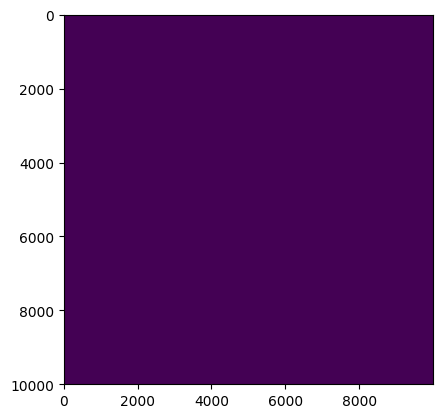

In [17]:
import matplotlib.pyplot as plt
plt.imshow(img)
# plt.imshow(x)

In [12]:
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

BACKBONE = 'inceptionresnetv2'
preprocess_input = get_preprocessing(BACKBONE)

# load your data
# x_train, y_train, x_val, y_val = load_data(...)

# preprocess input
x = preprocess_input(x)
# define model
model = Unet(BACKBONE, encoder_weights='imagenet')
model.compile('Adam', loss=bce_jaccard_loss, metrics=[iou_score])

# fit model
model.fit(
    x=x,
    y=y,
    batch_size=16,
    epochs=100,
    validation_data=(x, y),
)

## Todo

- [ ] Use `test_image.tif` and `solar_shapfile_test.shp` as input
- [ ] Create mask image from both inputs
  - [ ] Check the rasterized mask image
- [ ] tiling on both `test_image.tif` and `rasterized_mask` for Segmentation task
- [ ] Train U-Net model with `segmentation_models` library
  - [ ] Build Docker image for training